## Ribbon beam in free space. PIC algorithm realization

Estimate simulation parameters

In [288]:
from math import *

# estimates are done in SI units;
# to compose config file, conversion to CGS is provided 

kg_to_g = 1000
coulomb_to_statcoulomb = 2997924580
m = 9.8e-31
q = 1.6e-19
print( "q = {:.3e} [C] = {:.3e} [statC]".format( q, q * coulomb_to_statcoulomb ) )
print( "m = {:.3e} [kg] = {:.3e} [g]".format( m, m * kg_to_g ) )

m_to_cm = 100
x_0 = 0.0005
y_width = 0.008
print( "beam_width = {:.3f} [m] = {:.3f} [cm]".format( x_0, x_0 * m_to_cm ) )
print( "y_size = {:.3f} [m] = {:.3f} [cm]".format( y_width, y_width * m_to_cm ) )

I = 0.1
linear_current_density = I / y_width
print( "I = {:.3f} [A]".format( I ) )
print( "linear_current_density = {:.3f} [A/m]".format( linear_current_density ) )

voltage = 1000
q_electron = 1.60218e-19
ev_to_joule = 1.60218e-19
E = voltage * q / q_electron * ev_to_joule
v = sqrt( 2 * E / m )
print( "U = {:.3f} [V]".format( voltage ) )
print( "E = {:.3f} [eV]".format( E / ev_to_joule ) )
print( "v = {:.3e} [m/s]".format( v ) )

eps_0 = 8.85e-12
p = linear_current_density / ( 4 * eps_0 * sqrt( 2 * q / m ) * voltage**1.5 )
x0_2_times_wider = 2 * x_0
z_2_times_wider = sqrt( 2 * x_0 / p )
t_2_times_wider = z_2_times_wider / v
print( "x0_2_times_wider = {:.3f} [m] = {:.3f} [cm]".format(
    x0_2_times_wider, x0_2_times_wider * m_to_cm ) )
print( "t_2_times_wider = {:.3e} [s]".format( t_2_times_wider ) )
print( "z_2_times_wider = {:.3e} [m] = {:.3e} [cm]".format(
    z_2_times_wider, z_2_times_wider * m_to_cm ) )

sim_time = 1.5e-9
n_of_steps = 50
dt = sim_time / n_of_steps
print( "simulation_time = {:.3e} [s]".format( sim_time ) )
print( "number_of_time_steps = {:d}".format( n_of_steps ) )
print( "time_step_size = {:.3e} [s]".format( dt ) )

num_of_real_particles = I * dt / q
print( "num_of_real_particles = {:.3e}".format( num_of_real_particles ) )

num_of_macro_particles = 5000
macro_q = I * dt / num_of_macro_particles
macro_m = macro_q / q * m
macro_mean_momentum = macro_m * v
print( "num_of_macro_particles = {:d}".format( num_of_macro_particles ) )
print( "macro_q = {:.3e} [C] = {:.3e} [statC]".format(
    macro_q, macro_q * coulomb_to_statcoulomb ) )
print( "macro_m = {:.3e} [kg] = {:.3e} [g]".format( macro_m, macro_m * kg_to_g ) )
print( "macro_mean_momentum = {:.3e} [kg * m / s] = {:.3e} [g * cm / s]".format(
    macro_mean_momentum, macro_mean_momentum * m_to_cm * kg_to_g ) )


q = 1.600e-19 [C] = 4.797e-10 [statC]
m = 9.800e-31 [kg] = 9.800e-28 [g]
beam_width = 0.001 [m] = 0.050 [cm]
y_size = 0.008 [m] = 0.800 [cm]
I = 0.100 [A]
linear_current_density = 12.500 [A/m]
U = 1000.000 [V]
E = 998.639 [eV]
v = 1.807e+07 [m/s]
x0_2_times_wider = 0.001 [m] = 0.100 [cm]
t_2_times_wider = 3.959e-10 [s]
z_2_times_wider = 7.154e-03 [m] = 7.154e-01 [cm]
simulation_time = 1.500e-09 [s]
number_of_time_steps = 50
time_step_size = 3.000e-11 [s]
num_of_real_particles = 1.875e+07
num_of_macro_particles = 5000
macro_q = 6.000e-16 [C] = 1.799e-06 [statC]
macro_m = 3.675e-27 [kg] = 3.675e-24 [g]
macro_mean_momentum = 6.641e-20 [kg * m / s] = 6.641e-15 [g * cm / s]


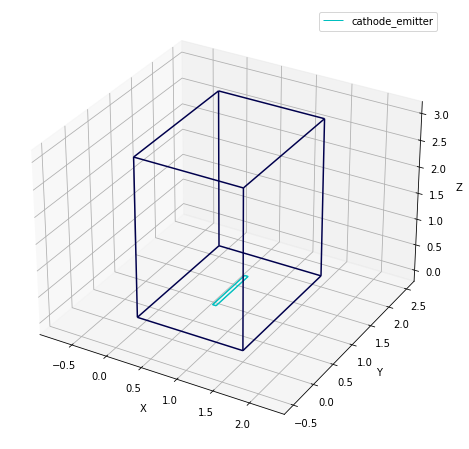

In [251]:
from ef.config.config import Config
from ef.config.visualizer import Visualizer3d
sim = Config.from_fname('contour.conf')
sim.visualize_all(Visualizer3d())

In [252]:
!ef contour.conf --output-format python

Trying to guess input file type: contour.conf
### Config:
time_grid = TimeGridConf(total=1.5e-09, save_step=1.5e-10, step=3e-11)
spatial_mesh = SpatialMeshConf(size=array([1.5, 2. , 3. ]), step=array([0.01, 0.05, 0.2 ]))
sources = [ParticleSourceConf(name='cathode_emitter', shape=Box(origin=array([0.725, 0.6  , 0.11 ]), size=array([0.05, 0.8 , 0.01])), initial_particles=5000, particles_to_generate_each_step=5000, momentum=array([0.000e+00, 0.000e+00, 6.641e-15]), temperature=0.0, charge=-1.799e-06, mass=3.675e-24)]
inner_regions = []
output_file = OutputFileConf(prefix='contour_', suffix='.h5', format_='python')
boundary_conditions = BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
particle_interaction_model = ParticleInteractionModelConf(model='PIC')
external_fields = []
  Detected a Hermitian matrix
Writing initial fields to file
Writing to file contour_fieldsWithoutParticles.h5
Writing step 0 to file
Writing to file contour_0000000.h5
Time step fro

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from ef.output.reader import Reader

SGSE_conv_unit_current_to_A = 3e10 * 0.1;     #from current units SGSE to A
SI_conv_cm_to_m = 0.01;
SI_conv_g_to_kg = 0.001
SI_conv_Fr_to_C = 3.3356409519815207e-10


In [254]:
filename = 'contour_0000050.h5'
with h5py.File( filename, mode="r") as h5:
    sim_PIC = Reader.read_simulation(h5)

In [255]:

particles_per_step = sim_PIC.particle_sources[0].particles_to_generate_each_step
current = np.abs(
    sim_PIC.particle_sources[0].particles_to_generate_each_step *
    sim_PIC.particle_sources[0].charge / 
    sim_PIC.time_grid.time_step_size
)
current = current / SGSE_conv_unit_current_to_A
print("source current = {} A".format(current))


source current = 0.09994444444444443 A


In [256]:
mass = sim_PIC.particle_sources[0].mass * SI_conv_g_to_kg
charge = sim_PIC.particle_sources[0].charge * SI_conv_Fr_to_C
momentum_z = sim_PIC.particle_sources[0].mean_momentum[2] * SI_conv_g_to_kg * SI_conv_cm_to_m
print("mass = {} kg".format(mass))
print("charge = {} Coloumb".format(charge))
print("z-momentum = {} kg*m/s".format(momentum_z))
print("charge/mass = {:e} C/kg".format(charge/mass))


mass = 3.6749999999999996e-27 kg
charge = -6.000818072614756e-16 Coloumb
z-momentum = 6.641e-20 kg*m/s
charge/mass = -1.632876e+11 C/kg


In [257]:
length_of_cathode = sim_PIC.particle_sources[0].shape.size[1] * SI_conv_cm_to_m
half_width = sim_PIC.particle_sources[0].shape.size[0] / 2 * SI_conv_cm_to_m
center_of_beam = sim_PIC.particle_sources[0].shape.origin[0] * SI_conv_cm_to_m + half_width
print("lenghth of cathode (in y) = {} m".format(length_of_cathode))
print("half width of cathode (in x) = {} m".format(half_width))
print("center of beam (in x) = {} m".format(center_of_beam))

lenghth of cathode (in y) = 0.008 m
half width of cathode (in x) = 0.0002500000000000002 m
center of beam (in x) = 0.0075 m


In [258]:
start_z = sim_PIC.particle_sources[0].shape.origin[2] * SI_conv_cm_to_m 
end_z = sim_PIC.mesh.size[2] * SI_conv_cm_to_m
print("start of beam (in z) = {} m".format(start_z))
print("end of beam (in z) = {} m".format(end_z))

start of beam (in z) = 0.0011 m
end of beam (in z) = 0.03 m


In [259]:
energy = (momentum_z * momentum_z) / (2 * mass)
voltage = energy / np.abs(charge)
print("voltage = {} V".format(voltage))    

voltage = 999.9289930438675 V


In [260]:
current_dens = current / length_of_cathode 
print("current density (along y) = {} A/m".format(current_dens))

current density (along y) = 12.493055555555554 A/m


In [261]:
eps = 8.85e-12
p_const = 1 / (4*eps*(np.abs(2*charge/mass))**0.5) * current_dens / voltage**1.5 ;   
print("p constant = {}".format(p_const))


p constant = 19.530803537714004


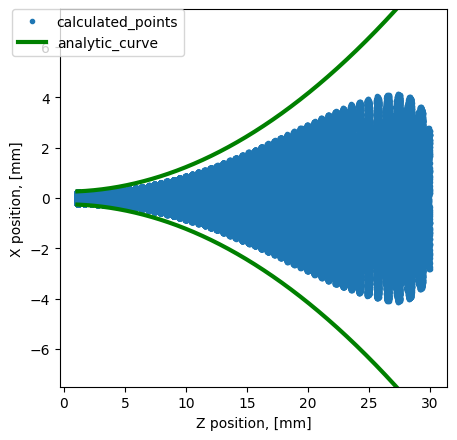

In [287]:
def contour(z_position, half_width, angle, p_const):
    y = half_width + np.tan(angle) * z_position + p_const / 2 * (z_position * z_position)         
    return y

conv_grad_to_rad = np.pi/180
angle = 0 * conv_grad_to_rad          #angle of beam
steps_z = 100000
position_z = np.arange(start_z,end_z,(end_z-start_z)/steps_z) 
# points in z direction, from 0 to 0.01 m with step 0,00001 m 

contour_y = contour(position_z, half_width, angle, p_const)
# countour calculation, m
plt.figure(figsize=(5,5), dpi = (100))
plt.xlabel("Z position, [mm]")
plt.ylabel("X position, [mm]")
plt.plot(sim_PIC.particle_arrays[0].positions[..., 2]*SI_conv_cm_to_m*1000,
         ((sim_PIC.particle_arrays[0].positions[..., 0]*SI_conv_cm_to_m - center_of_beam)*1000),
             '.',label="calculated_points") #plot particles

plt.plot(position_z*1000, contour_y*1000, color = 'g', lw = 3, label="analytic_curve") # plot countour in cm and move to left z of beam and top x of beam neat cathode
plt.plot(position_z*1000, -1 * contour_y*1000, color = 'g', lw = 3)
plt.ylim(-7.5,7.5)
plt.legend(bbox_to_anchor=(0.32, 1), loc=1, borderaxespad=0.)
# plt.savefig('countour_beam.png')        # save png picture
# h5.close()                              #close h5 file


## Ribbon beam in free space. Binary(BIN) algorithm realization

Estimate simulation parameters

In [289]:
from math import *

# estimates are done in SI units;
# to compose config file, conversion to CGS is provided 

kg_to_g = 1000
coulomb_to_statcoulomb = 2997924580
m = 9.8e-31
q = 1.6e-19
print( "q = {:.3e} [C] = {:.3e} [statC]".format( q, q * coulomb_to_statcoulomb ) )
print( "m = {:.3e} [kg] = {:.3e} [g]".format( m, m * kg_to_g ) )

m_to_cm = 100
x_0 = 0.0005
y_width = 0.008
print( "beam_width = {:.4f} [m] = {:.3f} [cm]".format( x_0, x_0 * m_to_cm ) )
print( "y_size = {:.3f} [m] = {:.3f} [cm]".format( y_width, y_width * m_to_cm ) )

I = 0.1
linear_current_density = I / y_width
print( "I = {:.3f} [A]".format( I ) )
print( "linear_current_density = {:.3f} [A/m]".format( linear_current_density ) )

voltage = 1000
q_electron = 1.60218e-19
ev_to_joule = 1.60218e-19
E = voltage * q / q_electron * ev_to_joule
v = sqrt( 2 * E / m )
print( "U = {:.3f} [V]".format( voltage ) )
print( "E = {:.3f} [eV]".format( E / ev_to_joule ) )
print( "v = {:.3e} [m/s]".format( v ) )

eps_0 = 8.85e-12
p = linear_current_density / ( 4 * eps_0 * sqrt( 2 * q / m ) * voltage**1.5 )
x0_2_times_wider = 2 * x_0
z_2_times_wider = sqrt( 2 * x_0 / p )
t_2_times_wider = z_2_times_wider / v
print( "x0_2_times_wider = {:.3f} [m] = {:.3f} [cm]".format(
    x0_2_times_wider, x0_2_times_wider * m_to_cm ) )
print( "t_2_times_wider = {:.3e} [s]".format( t_2_times_wider ) )
print( "z_2_times_wider = {:.3e} [m] = {:.3e} [cm]".format(
    z_2_times_wider, z_2_times_wider * m_to_cm ) )

sim_time = 1.5e-9
n_of_steps = 15
dt = sim_time / n_of_steps
print( "simulation_time = {:.3e} [s]".format( sim_time ) )
print( "number_of_time_steps = {:d}".format( n_of_steps ) )
print( "time_step_size = {:.3e} [s]".format( dt ) )

num_of_real_particles = I * dt / q
print( "num_of_real_particles = {:.3e}".format( num_of_real_particles ) )

num_of_macro_particles = 100
macro_q = I * dt / num_of_macro_particles
macro_m = macro_q / q * m
macro_mean_momentum = macro_m * v
print( "num_of_macro_particles = {:d}".format( num_of_macro_particles ) )
print( "macro_q = {:.3e} [C] = {:.3e} [statC]".format(
    macro_q, macro_q * coulomb_to_statcoulomb ) )
print( "macro_m = {:.3e} [kg] = {:.3e} [g]".format( macro_m, macro_m * kg_to_g ) )
print( "macro_mean_momentum = {:.3e} [kg * m / s] = {:.3e} [g * cm / s]".format(
    macro_mean_momentum, macro_mean_momentum * m_to_cm * kg_to_g ) )


q = 1.600e-19 [C] = 4.797e-10 [statC]
m = 9.800e-31 [kg] = 9.800e-28 [g]
beam_width = 0.0005 [m] = 0.050 [cm]
y_size = 0.008 [m] = 0.800 [cm]
I = 0.100 [A]
linear_current_density = 12.500 [A/m]
U = 1000.000 [V]
E = 998.639 [eV]
v = 1.807e+07 [m/s]
x0_2_times_wider = 0.001 [m] = 0.100 [cm]
t_2_times_wider = 3.959e-10 [s]
z_2_times_wider = 7.154e-03 [m] = 7.154e-01 [cm]
simulation_time = 1.500e-09 [s]
number_of_time_steps = 15
time_step_size = 1.000e-10 [s]
num_of_real_particles = 6.250e+07
num_of_macro_particles = 100
macro_q = 1.000e-13 [C] = 2.998e-04 [statC]
macro_m = 6.125e-25 [kg] = 6.125e-22 [g]
macro_mean_momentum = 1.107e-17 [kg * m / s] = 1.107e-12 [g * cm / s]


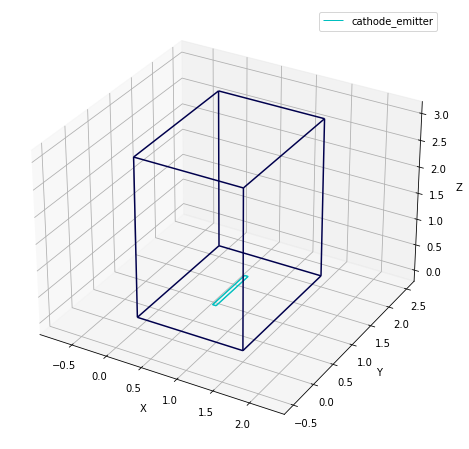

In [264]:
from ef.config.config import Config
from ef.config.visualizer import Visualizer3d
sim = Config.from_fname('contour_bin.conf')
sim.visualize_all(Visualizer3d())

In [265]:
!ef contour_bin.conf --output-format python

Trying to guess input file type: contour_bin.conf
### Config:
time_grid = TimeGridConf(total=1.5e-09, save_step=1.5e-10, step=1e-10)
spatial_mesh = SpatialMeshConf(size=array([1.5, 2. , 3. ]), step=array([0.01, 0.05, 0.2 ]))
sources = [ParticleSourceConf(name='cathode_emitter', shape=Box(origin=array([0.725, 0.6  , 0.11 ]), size=array([0.05, 0.8 , 0.01])), initial_particles=100, particles_to_generate_each_step=100, momentum=array([0.000e+00, 0.000e+00, 1.107e-12]), temperature=0.0, charge=-0.0002998, mass=6.125e-22)]
inner_regions = []
output_file = OutputFileConf(prefix='contour_bin_', suffix='.h5', format_='python')
boundary_conditions = BoundaryConditionsConf(right=0.0, left=0.0, bottom=0.0, top=0.0, near=0.0, far=0.0)
particle_interaction_model = ParticleInteractionModelConf(model='PIC')
external_fields = []
  Detected a Hermitian matrix
Writing initial fields to file
Writing to file contour_bin_fieldsWithoutParticles.h5
Writing step 0 to file
Writing to file contour_bin_0000000.h5

In [266]:
filename = 'contour_bin_0000015.h5'
with h5py.File( filename, mode="r") as h5:
    sim_BIN = Reader.read_simulation(h5)


In [267]:
particles_per_step = sim_BIN.particle_sources[0].particles_to_generate_each_step
current = np.abs(
    sim_BIN.particle_sources[0].particles_to_generate_each_step *
    sim_BIN.particle_sources[0].charge / 
    sim_BIN.time_grid.time_step_size
)
current = current / SGSE_conv_unit_current_to_A
print("source current = {} A".format(current))


source current = 0.09993333333333333 A


In [268]:
mass = sim_BIN.particle_sources[0].mass * SI_conv_g_to_kg
charge = sim_BIN.particle_sources[0].charge * SI_conv_Fr_to_C
momentum_z = sim_BIN.particle_sources[0].mean_momentum[2] * SI_conv_g_to_kg * SI_conv_cm_to_m
print("mass = {} kg".format(mass))
print("charge = {} Coloumb".format(charge))
print("z-momentum = {} kg*m/s".format(momentum_z))
print("charge/mass = {:e} C/kg".format(charge/mass))

mass = 6.125e-25 kg
charge = -1.00002515740406e-13 Coloumb
z-momentum = 1.107e-17 kg*m/s
charge/mass = -1.632694e+11 C/kg


In [269]:
length_of_cathode = sim_BIN.particle_sources[0].shape.size[1] * SI_conv_cm_to_m
half_width = sim_BIN.particle_sources[0].shape.size[0] / 2 * SI_conv_cm_to_m
center_of_beam = sim_BIN.particle_sources[0].shape.origin[0] * SI_conv_cm_to_m + half_width
print("lenghth of cathode (in y) = {} m".format(length_of_cathode))
print("half width of cathode (in x) = {} m".format(half_width))
print("center of beam (in x) = {} m".format(center_of_beam))

lenghth of cathode (in y) = 0.008 m
half width of cathode (in x) = 0.0002500000000000002 m
center of beam (in x) = 0.0075 m


In [280]:
start_z = sim_BIN.particle_sources[0].shape.origin[2] * SI_conv_cm_to_m 
end_z = sim_BIN.mesh.size[2] * SI_conv_cm_to_m
print("start of beam (in z) = {} m".format(start_z))
print("end of beam (in z) = {} m".format(end_z))

start of beam (in z) = 0.0011 m
end of beam (in z) = 0.03 m


In [281]:
energy = (momentum_z * momentum_z) / (2 * mass)
voltage = energy / np.abs(charge)
print("voltage = {} V".format(voltage))    

voltage = 1000.3413646203372 V


In [282]:
current_dens = current / length_of_cathode 
print("current density (along y) = {} A/m".format(current_dens))

current density (along y) = 12.491666666666667 A/m


In [283]:
eps = 8.85e-12
p_const = 1 / (4*eps*(np.abs(2*charge/mass))**0.5) * current_dens / voltage**1.5 ;   
print("p constant = {}".format(p_const))


p constant = 19.517642975934


(-7.5, 7.5)

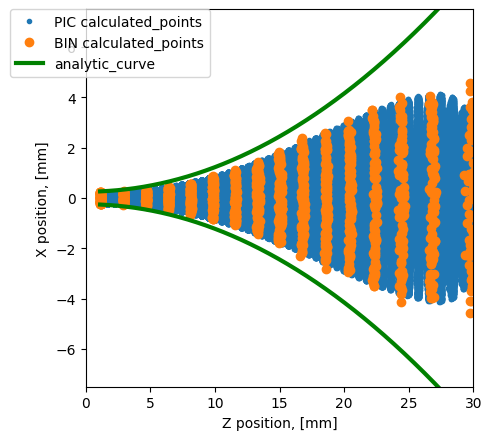

In [285]:
def contour(z_position, half_width, angle, p_const):
    y = half_width + np.tan(angle) * z_position + p_const / 2 * (z_position * z_position)         
    return y

conv_grad_to_rad = np.pi/180
angle = 0 * conv_grad_to_rad          #angle of beam
steps_z = 100000
position_z = np.arange(start_z,end_z,(end_z-start_z)/steps_z) 
# points in z direction, from 0 to 0.01 m with step 0,00001 m 

contour_y = contour(position_z, half_width, angle, p_const)
# countour calculation, m
plt.figure(figsize=(5,5), dpi = (100))
plt.xlabel("Z position, [mm]")
plt.ylabel("X position, [mm]")

plt.plot(sim_PIC.particle_arrays[0].positions[..., 2]*SI_conv_cm_to_m*1000,
         ((sim_PIC.particle_arrays[0].positions[..., 0]*SI_conv_cm_to_m - center_of_beam)*1000),
             '.',label="PIC calculated_points") #plot particles

plt.plot(sim_BIN.particle_arrays[0].positions[..., 2]*SI_conv_cm_to_m*1000,
         ((sim_BIN.particle_arrays[0].positions[..., 0]*SI_conv_cm_to_m - center_of_beam)*1000),
             'o',label="BIN calculated_points") #plot particles

plt.plot(position_z*1000, contour_y*1000, color = 'g', lw = 3, label="analytic_curve") # plot countour in cm and move to left z of beam and top x of beam neat cathode
plt.plot(position_z*1000, -1 * contour_y*1000, color = 'g', lw = 3)
plt.legend(bbox_to_anchor=(0.32, 1), loc=1, borderaxespad=0.)
plt.xlim(0,30)
plt.ylim(-7.5,7.5)
# plt.savefig('countour_beam.png')        # save png picture
# h5.close()                              #close h5 file
